In [19]:
!pip install -q kaggle

In [20]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
# API to featch the dataset from kaggle
! kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 99% 216M/218M [00:10<00:00, 25.0MB/s]
100% 218M/218M [00:10<00:00, 21.1MB/s]


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/cat-and-dog.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
%ls

cat-and-dog.zip  kaggle.json  sample_data/  test_set/  training_set/


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt


In [8]:
# Define dataset directory paths
train_dir = "/content/training_set/training_set"
test_dir = "/content/test_set/test_set"

# Verify directory structure
print("Training Directory:", train_dir)
print("Testing Directory:", test_dir)


Training Directory: /content/training_set/training_set
Testing Directory: /content/test_set/test_set


In [9]:
# Define ImageDataGenerator for Training and Testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for test set

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [10]:
# Build a CNN Model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Model Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Train the CNN Model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)


Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 57s 227ms/step - accuracy: 0.7644 - loss: 0.4776 - val_accuracy: 0.7929 - val_loss: 0.4395
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 58s 231ms/step - accuracy: 0.7757 - loss: 0.4668 - val_accuracy: 0.8117 - val_loss: 0.4255
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 59s 237ms/step - accuracy: 0.7958 - loss: 0.4489 - val_accuracy: 0.7879 - val_loss: 0.4484
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 56s 224ms/step - accuracy: 0.7944 - loss: 0.4502 - val_accuracy: 0.8235 - val_loss: 0.3841
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 56s 221ms/step - accuracy: 0.8001 - loss: 0.4400 - val_accuracy: 0.8216 - val_loss: 0.4044
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 59s 236ms/step - accuracy: 0.7861 - loss: 0.4441 - val_accuracy: 0.8300 - val_loss: 0.3971
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 59s 234ms/step - accuracy: 0.8030 - loss: 0.4220 - val_accuracy: 0.8478 - val_loss: 0.3646
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 57s 226ms/step - accuracy: 0.8134 - loss: 0

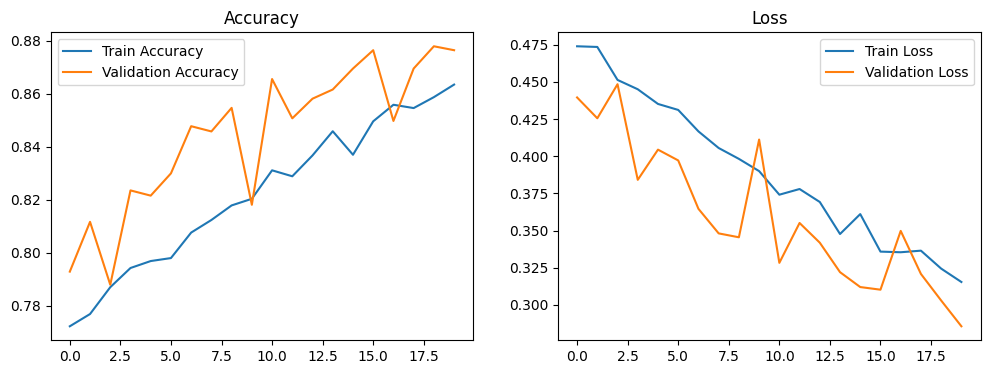

In [34]:
# Plot Training & Validation Accuracy/Loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [35]:
model.save("cat_dog_classifier.h5")

In [36]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = "/content/test_set/test_set/cats/cat.4004.jpg"  # Change this path
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

if prediction[0] > 0.5:
    print("Predicted: Dog 🐶")
else:
    print("Predicted: Cat 🐱")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted: Cat 🐱


In [37]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.8767 - loss: 0.2827
Test Accuracy: 87.64%


In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


In [39]:
# Get true labels and predictions
true_labels = []
pred_labels = []

for images, labels in test_generator:
    preds = model.predict(images)  # Get predictions
    pred_labels.extend(np.round(preds).flatten())  # Convert to 0 (Cat) or 1 (Dog)
    true_labels.extend(labels)  # Store actual labels

    if len(true_labels) >= test_generator.samples:  # Stop when all samples are covered
        break

true_labels = np.array(true_labels)
pred_labels = np.array(pred_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

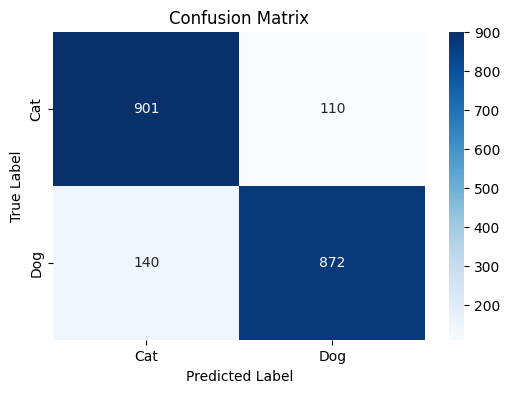

In [40]:
# Create confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [41]:
# Print precision, recall, and F1-score
print(classification_report(true_labels, pred_labels, target_names=["Cat", "Dog"]))


              precision    recall  f1-score   support

         Cat       0.87      0.89      0.88      1011
         Dog       0.89      0.86      0.87      1012

    accuracy                           0.88      2023
   macro avg       0.88      0.88      0.88      2023
weighted avg       0.88      0.88      0.88      2023

